In [5]:
from astropy.io import fits
import fitsio
import numpy as np
import matplotlib.pyplot as plt
import time
from tqdm import tqdm

In [2]:
FILENAME = 'NG2346-3633_802_2016_CYCLE1807.fits'
# hdu = fits.open('NG2346-3633_802_2016_CYCLE1807.fits')

In [ ]:
# hdu.info()

In [ ]:
# with fits.open(FILENAME) as hdu:
#     s = time.time()
#     n = 10
#     dic = {
#         'OBJ_ID': hdu['CATALOGUE'].data['OBJ_ID'][:n],
#         'SYSREM_FLUX3': hdu['SYSREM_FLUX3'].data[:n],
#         'HJD': hdu['HJD'].data[:n],
#         'FLAGS': hdu['FLAGS'].data[:n]
#     }
#     e = time.time()
#     print 'Data loaded in {} seconds'.format(e-s)

In [ ]:
# dic

In [ ]:
# print data

In [ ]:
# with fitsio.FITS(FILENAME) as data:
# #     data = f[0].read()
#     s = time.time()
#     dic = {
#         'OBJ_ID': data['CATALOGUE']['OBJ_ID'][:n],
#         'SYSREM_FLUX3': data['SYSREM_FLUX3'][:n,:],
#         'HJD': data['HJD'][:n,:],
#         'FLAGS': data['FLAGS'][:n,:]
#     }
#     e = time.time()
#     print 'Data loaded in {} seconds'.format(e-s)

In [ ]:
# dic

In [6]:
import sys
sys.path.append('/appch/data/jtb34/GitHub/GACF/')
from NGTS.NGTS_Field import NGTSField
from NGTS.GACF_utils import pop_dict_item, clean_data_dict

def load_from_fits(self, filename, obj_ids=None, num_objs=None, method='fitsio', 
                   bin=True, delete_unbinned=True, clean_data=True):
    if method == 'astropy':
        with fits.open(FILENAME) as hdu:
#             s = time.time()
            dic = {
                'OBJ_ID': map(int, hdu['CATALOGUE'].data['OBJ_ID'][:num_objs]),
                'SYSREM_FLUX3': hdu['SYSREM_FLUX3'].data[:num_objs],
                'HJD': hdu['HJD'].data[:num_objs],
                'FLAGS': hdu['FLAGS'].data[:num_objs]
            }
#             e = time.time()
#             print 'Data loaded in {} seconds'.format(e-s)
    elif method == 'fitsio':
        with fitsio.FITS(FILENAME) as data:
#             gds = time.time()
            dic = {
                'OBJ_ID': map(int,data['CATALOGUE']['OBJ_ID'][:num_objs]),
                'SYSREM_FLUX3': data['SYSREM_FLUX3'][:num_objs,:],
                'HJD': data['HJD'][:num_objs,:],
                'FLAGS': data['FLAGS'][:num_objs,:]
            }
#             for k, v in dic.iteritems():
#                 print k, ':', len(v)
#             for k, v in dic.iteritems():
#                 print k, ':', len(v)
#             gde = time.time()
#             print 'Data loaded in {} seconds'.format(e-s)
    else:
        raise Exception('Method should be astropy or fitsio')
    dic = clean_data_dict(dic)
    if len(self.objects) == 0:
#         ios = time.time()
        self.initialise_objects()
#         ioe = time.time()
    obj_ids = self.object_list if obj_ids is None else obj_ids
    index_list = np.array(dic['OBJ_ID'])
#     print dic['OBJ_ID']
    if len(obj_ids) <= 1:
            obj_id = int(dic['OBJ_ID'])
            try:
                self[obj_id].get_data_from_dict(dic)
            except KeyError:
                warnings.warn('No data found for object {}'.format(obj_id))
            if bin:
                self[obj_id].bin_data(delete_unbinned=delete_unbinned)
    else:
#         bin_time = 0
#         get_data_dict_time = 0
#         create_data_dict_time = 0
#         find_idx_time = 0
        for obj_id in obj_ids:
#             print 'processing obj', obj_id
#             idxs= time.time()
            idx,  = np.where(index_list == obj_id)
#             idxe = time.time()
#             print 'OBJ {} at index {}'.format(obj_id, idx)
#             dds = time.time()
            obj_data = {
                'OBJ_ID': obj_id,
                'SYSREM_FLUX3': dic['SYSREM_FLUX3'][idx],
                'HJD': dic['HJD'][idx],
                'FLAGS': dic['FLAGS'][idx],                
            }
#             dde = time.time()
            try:
#                 gdds = time.time()
                self[obj_id].get_data_from_dict(obj_data)
#                 gdde = time.time()
            except KeyError:
                warnings.warn('No data found for object {}'.format(obj_id))
                continue
            if bin:
#                 bds = time.time()
                self[obj_id].bin_data(delete_unbinned=delete_unbinned)
#                 bde = time.time()
#             bin_time += bde-bds
#             get_data_dict_time += gdde-gdds
#             create_data_dict_time += dde-dds
#             find_idx_time += idxe-idxs
    if clean_data:
#         rms = time.time()
        self.remove_bad_objects()
#         rme = time.time()
#     remove_time = rme-rms

#     init_time = ioe-ios
#     get_data_time = gde-gds
    
#     print 'Got Data in ', get_data_time, 'seconds'
# #     print 'Initialised objects in ', init_time, 'seconds'
#     print 'Found indexes in ', find_idx_time, 'seconds'
#     print 'Found obj data in ', create_data_dict_time, 'seconds'
#     print 'Added object data in ', get_data_dict_time, 'seconds'
#     print 'Binned object data in ', bin_time, 'seconds'
#     print 'Removed bad objects in ', remove_time, 'seconds'




In [7]:
nobjs = np.arange(10, 500, 50)
print nobjs
astropy_times = []
fitsio_times = []
ngtsio_times = []
for i in tqdm(nobjs):
    t1 = time.time()
    field = NGTSField(fieldname='NG2346-3633', test='CYCLE1807')
    load_from_fits(field, FILENAME, num_objs=i, clean_data=True, delete_unbinned=False, method='astropy')
    t2 = time.time()
    field = None
    t3 = time.time()
    field = NGTSField(fieldname='NG2346-3633', test='CYCLE1807')
    load_from_fits(field, FILENAME, num_objs=i, clean_data=True, delete_unbinned=False, method='astropy')
    t4 = time.time()
    objs = field.object_list
    field = None
    t5 = time.time()
    field = NGTSField(fieldname='NG2346-3633', test='CYCLE1807')
    if objs:
        field.get_object_lc_bulk(obj_ids=objs, clean_data=True, delete_unbinned=False)
    t6 = time.time()
    astropy_times.append(t2-t1)
    fitsio_times.append(t4-t3)
    ngtsio_times.append(t6-t5)

  0%|          | 0/10 [00:00<?, ?it/s]

[ 10  60 110 160 210 260 310 360 410 460]



	 Mean of empty slice

 50%|█████     | 5/10 [37:00<40:21, 484.40s/it]

KeyboardInterrupt: 

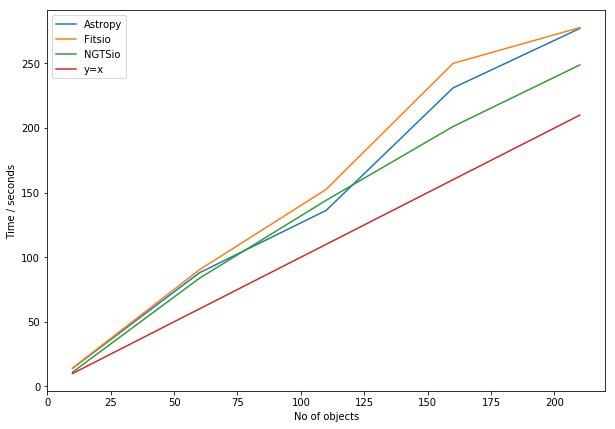

In [12]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(nobjs[:len(astropy_times)], astropy_times, label='Astropy')
ax.plot(nobjs[:len(fitsio_times)], fitsio_times, label='Fitsio')
ax.plot(nobjs[:len(ngtsio_times)], ngtsio_times, label='NGTSio')
ax.plot(nobjs[:len(ngtsio_times)], nobjs[:len(ngtsio_times)], label='y=x')
ax.legend()
ax.set_xlabel('No of objects')
ax.set_ylabel('Time / seconds')
plt.show()

In [14]:
print nobjs[:len(astropy_times)]
print astropy_times
print fitsio_times
print ngtsio_times

[ 10  60 110 160 210]
[14.001271963119507, 87.93563079833984, 136.26096391677856, 231.01557803153992, 277.080579996109]
[14.255766153335571, 90.25240802764893, 152.51208305358887, 250.00490188598633, 277.741042137146]
[11.064788818359375, 83.69832491874695, 144.07584595680237, 201.1417818069458, 248.83234000205994]


In [ ]:
# s = time.time()
# field1 = NGTSField(fieldname='NG2346-3633', test='CYCLE1807')
# load_from_fits(field1, FILENAME, num_objs=50, clean_data=True, delete_unbinned=False, method='astropy')
# e = time.time()
# print 'Time from fits', e-s, 'seconds'

In [ ]:
# field1.objects

In [ ]:
# s = time.time()
# field2 = NGTSField(fieldname='NG2346-3633', test='CYCLE1807')
# field2.get_object_lc_bulk(obj_ids=field1.object_list, clean_data=True, delete_unbinned=False)
# e = time.time()
# print 'Time from ngtsio', e-s, 'seconds'

In [15]:
import itertools
from NGTS.GACF_utils import medsig, segment_times, match_dimensions

def rebin_err(t, f, dt=0.02, get_err_on_mean=False, bin_about=None):
    """
    Rebin a time-series with errors on the data (y-points).
    Apply unweighted average: ignore errors on the data to be binned and
                              perform a simple MAD estimation of the error
                              from the scatter of points
    """
    treg = np.r_[t.min():t.max():dt]
    if bin_about is not None:
        treg = np.concatenate([np.r_[bin_about: t.min(): -dt][::-1],
                               np.r_[bin_about + dt: t.max():  dt]])
    nreg = len(treg)
    freg = np.zeros(nreg) + np.nan
    freg_err = np.zeros(nreg) + np.nan
    for i in np.arange(nreg):
        l = (t >= treg[i]) * (t < treg[i] + dt)
        if l.any():
            treg[i] = np.nanmean(t[l])
            freg[i], freg_err[i] = medsig(f[l])
            if get_err_on_mean:
                # freg_err[i] /= float(len(f[l]))
                freg_err[i] /= np.sqrt(float(len(f[l])))
    l = np.isfinite(freg)
    return treg[l], freg[l], freg_err[l]

def rebin_err_chunks(t, f, dt=0.02, get_err_on_mean=False):
    times = segment_times(t, dt)
    fluxes = match_dimensions(times, f)
    times_binned = []
    fluxes_binned = []
    flux_errs_binned = []
    nreg = 0
    n_data = 0
    for i, each_time in enumerate(times):
        tbin, fbin, ferr = rebin_err(np.array(each_time), np.array(fluxes[i]), 
                                     dt=dt, get_err_on_mean=get_err_on_mean)
        times_binned.append(tbin)
        fluxes_binned.append(fbin)
        flux_errs_binned.append(ferr)
    treg = list(itertools.chain(*times_binned))
    freg = list(itertools.chain(*fluxes_binned))
    freg_err = list(itertools.chain(*flux_errs_binned))
    
    return treg, freg, freg_err

In [16]:


def split_and_bin_data(self, i, t, f, tbin=0.02):
#     tref = 
#     dt = 1
#     tn = []
#     fn = []
#     tnb, fnb, fnberr = [],[],[]
# #tref = reference time, nominally 12 noon to split the data into days
# # dt = 1 day
# # tn=[]   empty list for times each night
# # fn=[]   empty list for fluxes each night
# # m2d = mins-to-days = 1./(24.*60.)
# # tnb, fnb, fnberr = lists of empty lists (one for each night)
    
    
    
    treg = np.r_[t.min():t.max():dt]
    treg = np.concatenate([ np.r_[tref         : t.min() : -dt][::-1], \
                            np.r_[tref+dt : t.max() :  dt] ])
    nreg = len(treg)
    freg = np.zeros(nreg) + np.nan
    for j in np.arange(nreg):
        l = np.logical_and( (t >= treg[j]), (t < treg[j]+dt) )

        if l.any():
            ll = (f[l]>0.)
            tn[i].append(t[l][ll])
            fn[i].append(f[l][ll])

            if tbin < t[l][ll][-1]-t[l][ll][0]:
                tb, fb, fberr = rebin_err(t[l][ll], f[l][ll], dt=tbin, \
                                              get_err_on_mean=True)
                emed, esig = medsig(fberr)
                le = np.logical_and((fberr>max(0,emed-5*esig)), (fberr<emed+5*esig))
            elif tbin >= t[l][ll][-1]-t[l][ll][0]:
                tb = np.array([ np.nanmean(t[l][ll]) ])
                fb, fberr = medsig(f[l][ll])
                fb = np.array([fb])
                fberr = np.array([fberr/np.sqrt(len(f[l][ll]))])
                le = np.ones(1, dtype=bool)
                #print(tb, fb, fberr, le)
            else:
                tb = copy.copy(t[l][ll])
                fb = copy.copy(f[l][ll])
                fberr = np.full(len(tb), np.nan)
                le = np.ones(len(tb), dtype=bool)

            tnb[i].append(tb[le])
            fnb[i].append(fb[le])
            fnberr[i].append(fberr[le])
    nnights = len(self.tnb[i])

In [23]:
n = 10
with fitsio.FITS(FILENAME) as data:
#     data = f[0].read()
    s = time.time()
    dic = {
        'OBJ_ID': data['CATALOGUE']['OBJ_ID'][:n],
        'SYSREM_FLUX3': data['SYSREM_FLUX3'][:n,:],
        'HJD': data['HJD'][:n,:],
        'FLAGS': data['FLAGS'][:n,:]
    }
    e = time.time()
    print 'Data loaded in {} seconds'.format(e-s)

Data loaded in 0.0455811023712 seconds


In [43]:
dic

{'FLAGS': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint16),
 'HJD': array([[73817235, 73817248, 73817260, ..., 94961291, 94961304, 96856786],
        [73817233, 73817246, 73817258, ..., 94961293, 94961306, 96856787],
        [73817222, 73817235, 73817247, ..., 94961307, 94961320, 96856799],
        ...,
        [73817233, 73817246, 73817258, ..., 94961293, 94961306, 96856788],
        [73817231, 73817244, 73817256, ..., 94961295, 94961308, 96856789],
        [73817223, 73817236, 73817248, ..., 94961306, 94961319, 96856798]],
       dtype=int32),
 'OBJ_ID': array(['000046', '000051', '000054', '000055', '000056', '000058',
        '000064', '000066', '000074', '000082'], dtype='|S6'),
 'SYSREM_FLUX3': array([[   0.       ,    0.       ,    0.       , ...,    0.       ,
            0.       , -149.66512  ],
       

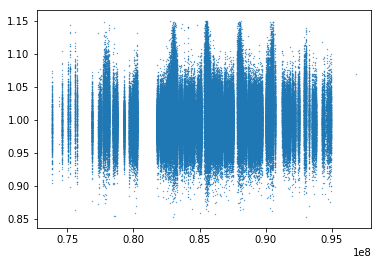

In [49]:
i = 7
timeseries, flux = dic['HJD'][i], dic['SYSREM_FLUX3'][i]
idx_ok = np.where(dic['FLAGS'][i] == 0)
timeseries = timeseries[idx_ok]
flux = flux[idx_ok]
med, sig = medsig(flux)
idx_ok = np.where(abs(flux - med) < 5 * sig)
timeseries = timeseries[idx_ok]
flux = flux[idx_ok]
flux = np.divide(flux, med)
plt.scatter(timeseries, flux, s=0.1)
plt.show()

In [51]:
# t1 = time.time()
# tbin, fbin, err = rebin_err(timeseries, flux, get_err_on_mean=True)
t2 = time.time()
tbin2, fbin2, err = rebin_err_chunks(timeseries, flux, get_err_on_mean=True)
t3 = time.time()
# print 'bin time normal:', t2-t1, 'seconds'
print 'bin time chunks:', t3-t2, 'seconds'

NameError: global name 'segment_times' is not defined

In [ ]:
# import json
# with open('info_dic.json', 'w') as f:
#     json.dump(dic, f)
# # inputted fits files ~ 9GB
# # outputted json file killed after 12GB...

In [ ]:
# map(int, np.array(obj_ids).tolist())

In [ ]:
# dic.keys()

In [ ]:
# dic['SYSREM_FLUX3'][4]

In [ ]:
# len(obj_ids[:None])